In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('LUBS5990M_courseworkData_202425.csv')

In [4]:
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,10/08/2020,31/12/2020,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,01/08/2020,31/12/2020,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,01/03/2019,31/12/2020,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,25/06/2020,31/01/2021,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaN,NaN,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             6124 non-null   object 
 1   ico_start           5378 non-null   object 
 2   ico_end             5242 non-null   object 
 3   price_usd           5662 non-null   object 
 4   success             6146 non-null   object 
 5   distributed_in_ico  4661 non-null   object 
 6   sold_tokens         180 non-null    object 
 7   token_for_sale      4908 non-null   float64
 8   whitelist           3712 non-null   object 
 9   kyc                 6125 non-null   float64
 10  bonus               6125 non-null   float64
 11  restricted_areas    1954 non-null   object 
 12  min_investment      1984 non-null   object 
 13  mvp                 1243 non-null   object 
 14  pre_ico_start       2605 non-null   object 
 15  pre_ico_end         2593 non-null   object 
 16  pre_ic

In [6]:
df['ico_end'] = pd.to_datetime(df['ico_end'], errors='coerce')
df['ico_start'] = pd.to_datetime(df['ico_start'], errors='coerce')
df['pre_ico_end'] = pd.to_datetime(df['ico_end'], errors='coerce')
df['pre_ico_start'] = pd.to_datetime(df['ico_start'], errors='coerce')

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_66296/86657046.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ico_end'] = pd.to_datetime(df['ico_end'], errors='coerce')


In [7]:
# Calculate the length of the ICO
df['ico_length'] = df['ico_end'] - df['ico_start']
df['pre_ico_length'] = df['pre_ico_end'] - df['pre_ico_start']

In [8]:
df['success'] = df['success'].map({'Y': 1, 'N': 0})
df['whitelist'] = df['whitelist'].map({'Yes': 1, 'No': 0})


In [9]:
df['link_white_paper'] = np.where(df['link_white_paper'].isna(), 0, 1)
df['github_link'] = np.where(df['github_link'].isna(), 0, 1)
df['website'] = np.where(df['website'].isna(), 0, 1)
df['linkedin_link'] = np.where(df['linkedin_link'].isna(), 0, 1)

In [10]:
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20,ico_length,pre_ico_length
0,India,2020-10-08,2020-12-31,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,...,"BTC, ETH, and Fiat currency",0,1,0,0,4.0,NaN,1.0,84 days,84 days
1,Cyprus,2020-01-08,2020-12-31,0.1,0,0.6,NaN,84000000.0,0.0,1.0,...,"ETH, BTC",1,1,1,1,4.8,14.0,1.0,358 days,358 days
2,UK,2019-01-03,2020-12-31,0.14,1,0.5,NaN,75000000.0,0.0,0.0,...,"ETH, BTC, LTC",1,1,0,0,4.5,14.0,1.0,728 days,728 days
3,UK,NaT,2021-01-31,0.1,0,0.5,NaN,500000000.0,1.0,1.0,...,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",1,1,0,0,4.7,43.0,1.0,NaT,NaT
4,Seychelles,NaT,NaT,0.06,0,0.4,NaN,400000000.0,1.0,1.0,...,ETH,1,1,1,1,4.4,16.0,1.0,NaT,NaT


In [11]:
df['accepting'] = df['accepting'].str.replace('and', '').str.strip()

accepting_dummies = df['accepting'].str.get_dummies(sep=',')


In [12]:
threshold = df.shape[0] * 0.01
accepting_dummies = accepting_dummies.loc[:, accepting_dummies.sum() > threshold]
df = pd.concat([df, accepting_dummies], axis=1)
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,2020-10-08,2020-12-31,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,2020-01-08,2020-12-31,0.1,0,0.6,NaN,84000000.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,UK,2019-01-03,2020-12-31,0.14,1,0.5,NaN,75000000.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,UK,NaT,2021-01-31,0.1,0,0.5,NaN,500000000.0,1.0,1.0,...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,NaT,NaT,0.06,0,0.4,NaN,400000000.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
def returnlist(row):
    if isinstance(row, str) and pd.notna(row): 
        return [country.strip() for country in row.split(',')]  
    return row  

df['restricted_areas'] = df['restricted_areas'].apply(returnlist)

In [14]:
df['restricted_areas']

0               [Pakistan, Turkey, Somalia, Sirya, Sudan]
1                                                   [USA]
2       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
3       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
4           [USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES]
                              ...                        
6141                                                  NaN
6142                                                  NaN
6143                                                  NaN
6144                                                  NaN
6145                                                  NaN
Name: restricted_areas, Length: 6146, dtype: object

In [15]:
import country_converter as coco
cc = coco.CountryConverter()


In [16]:
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,2020-10-08,2020-12-31,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,2020-01-08,2020-12-31,0.1,0,0.6,NaN,84000000.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,UK,2019-01-03,2020-12-31,0.14,1,0.5,NaN,75000000.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,UK,NaT,2021-01-31,0.1,0,0.5,NaN,500000000.0,1.0,1.0,...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,NaT,NaT,0.06,0,0.4,NaN,400000000.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# Explode the restricted_areas column so that each country is in its own row
df_exploded = df.explode('restricted_areas')

# Convert the countries to ISO3 codes
iso3_codes = cc.pandas_convert(series=pd.Series(df_exploded['restricted_areas']), to='ISO3')

Sirya not found in regex
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match 

In [18]:
iso3_codes

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: restricted_areas, Length: 11805, dtype: object

In [19]:

# Add the iso3_codes column to df_exploded
df_exploded['iso3_codes'] = iso3_codes.values

df_exploded['iso3_codes']

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: iso3_codes, Length: 11805, dtype: object

In [20]:
restricted_areas = df_exploded.groupby(df_exploded.index).agg({'iso3_codes': lambda x: ",".join(map(str, x.fillna('')))})

In [21]:
restricted_areas

,iso3_codes
0,"PAK,TUR,SOM,not found,SDN"
1,USA
2,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,['PRK', 'R..."
3,"CUB,IRN,LBN,SYR,LBY,SDN,['PRK', 'SOM'],YEM"
4,"USA,CAN,CHN,KOR,SYC"
...,...
6141,not found
6142,not found
6143,not found
6144,not found


In [22]:
df['restricted_areas'] = restricted_areas['iso3_codes'].values

In [23]:
df['restricted_areas'] = df['restricted_areas'].str.replace(r"[\[\]']", '', regex=True)

In [24]:
areas_dummies = df['restricted_areas'].str.get_dummies(sep=',')
threshold = df.shape[0] * 0.01
areas_dummies = areas_dummies.loc[:, areas_dummies.sum() > threshold]
df = pd.concat([df, areas_dummies], axis=1)
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,PAK,PRK,SDN,SGP,SOM,SYR,TUN,USA,YEM,not found
0,India,2020-10-08,2020-12-31,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,...,1,0,1,0,1,0,0,0,0,1
1,Cyprus,2020-01-08,2020-12-31,0.1,0,0.6,NaN,84000000.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,UK,2019-01-03,2020-12-31,0.14,1,0.5,NaN,75000000.0,0.0,0.0,...,0,1,1,0,1,1,0,0,0,0
3,UK,NaT,2021-01-31,0.1,0,0.5,NaN,500000000.0,1.0,1.0,...,0,1,1,0,0,1,0,0,1,0
4,Seychelles,NaT,NaT,0.06,0,0.4,NaN,400000000.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0


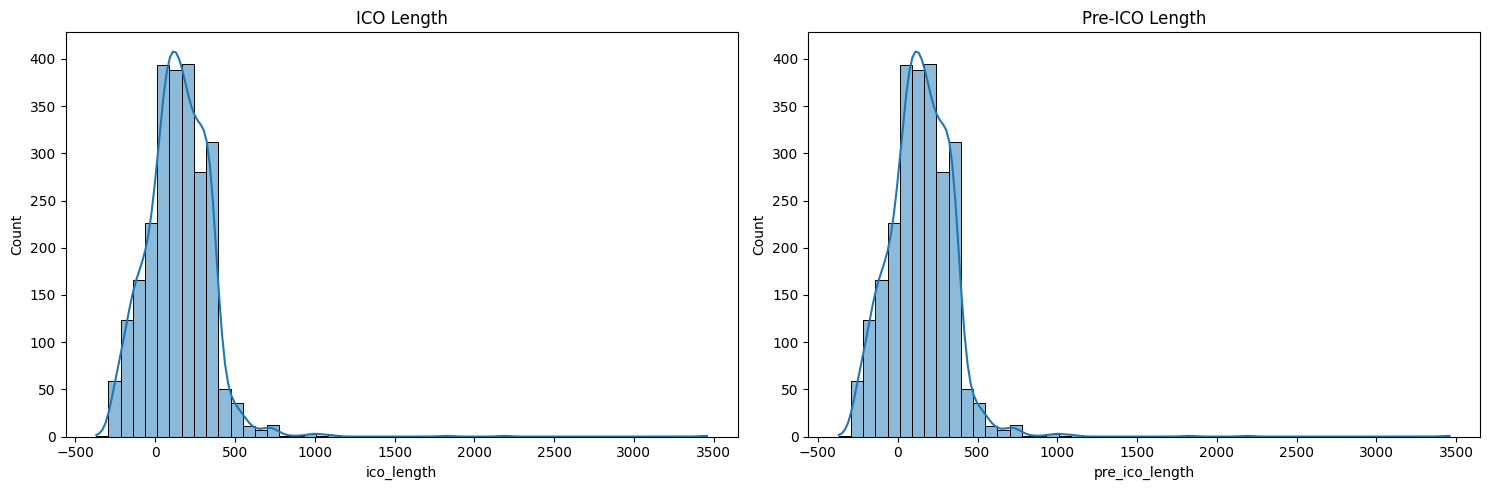

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['ico_length'].dt.days, bins=50, kde=True, ax=ax[0])
sns.histplot(df['pre_ico_length'].dt.days, bins=50, kde=True, ax=ax[1])
ax[0].set_title('ICO Length')
ax[1].set_title('Pre-ICO Length')
plt.tight_layout()

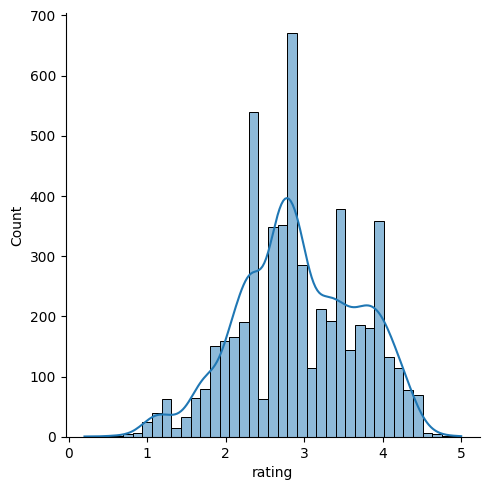

In [26]:
sns.displot(df['rating'], kde=True)

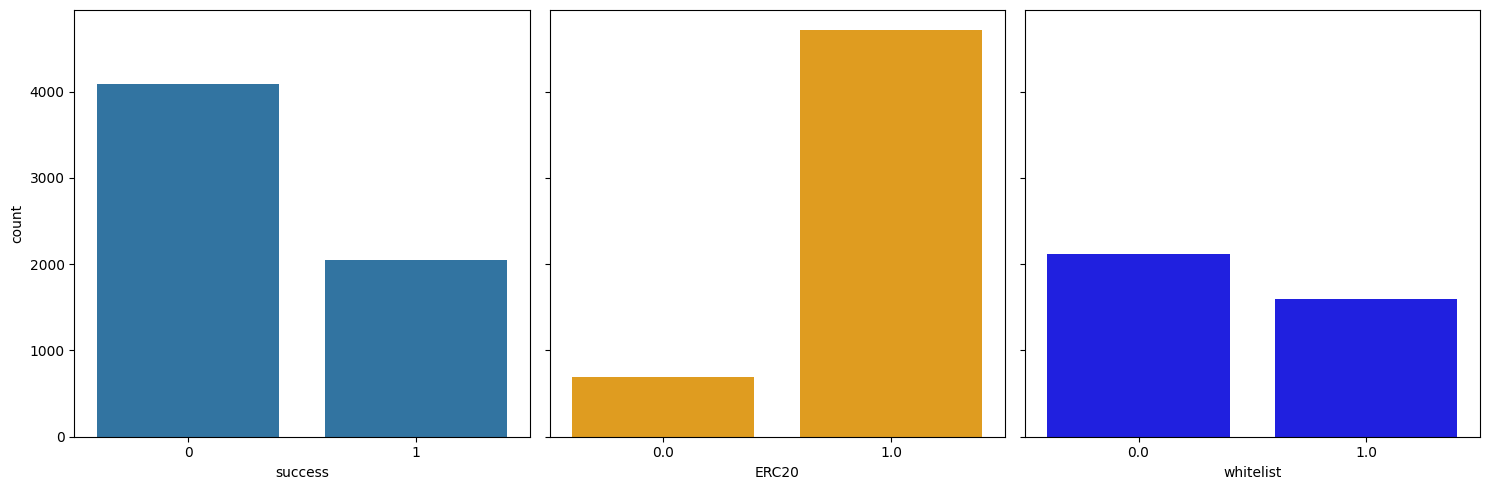

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(data=df, x='success', ax=ax[0])
sns.countplot(data=df, x='ERC20', ax=ax[1], color='orange')
sns.countplot(data=df, x='whitelist', ax=ax[2], color='blue')
plt.tight_layout()

<Axes: xlabel='distributed_in_ico', ylabel='success'>

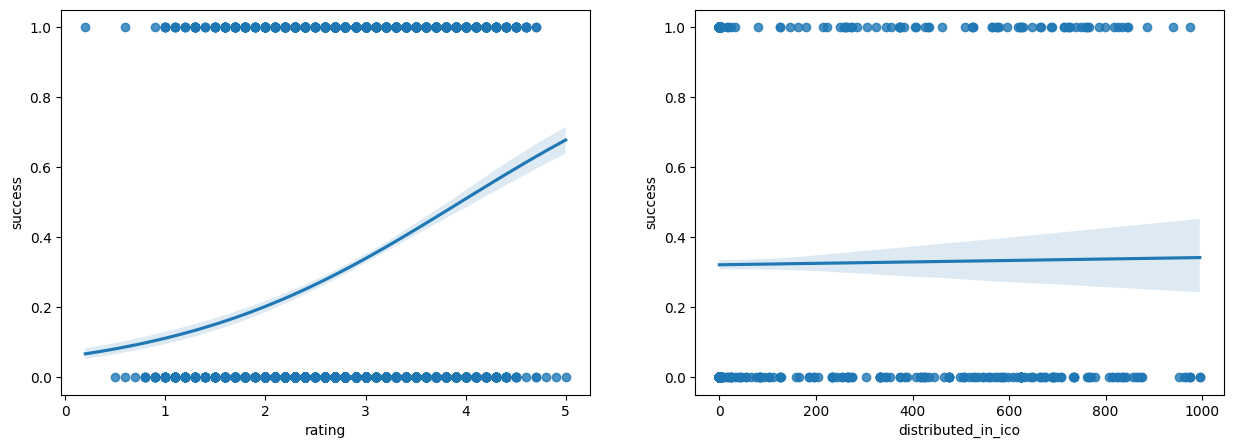

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first regplot
sns.regplot(data=df, x='rating', y='success', logistic=True, ax=ax[0])

# Ensure 'distributed_in_ico' column is numericwilco
df['distributed_in_ico'] = pd.to_numeric(df['distributed_in_ico'], errors='coerce')

# Plot the second regplot
sns.regplot(data=df, x='distributed_in_ico', y='success', logistic=True, ax=ax[1])

In [29]:
df.columns.values

array(['country', 'ico_start', 'ico_end', 'price_usd', 'success',
       'distributed_in_ico', 'sold_tokens', 'token_for_sale', 'whitelist',
       'kyc', 'bonus', 'restricted_areas', 'min_investment', 'mvp',
       'pre_ico_start', 'pre_ico_end', 'pre_ico_price_usd', 'accepting',
       'link_white_paper', 'linkedin_link', 'github_link', 'website',
       'rating', 'teamsize', 'ERC20', 'ico_length', 'pre_ico_length',
       ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR', ' Fiat', ' LTC',
       ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC', 'ETH', 'AFG',
       'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR', 'LBY', 'LKA',
       'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN', 'USA', 'YEM',
       'not found'], dtype=object)

In [30]:
# Remove duplicate columns in the DataFrame
map = pd.DataFrame({'country': areas_dummies.columns, 'count': areas_dummies.sum(axis=0).values})

In [31]:
import plotly.express as px

fig = px.choropleth(map, locations='country', hover_name='country', hover_data=['count'],
                    projection='natural earth', locationmode='ISO-3', color='count',)
fig.show()

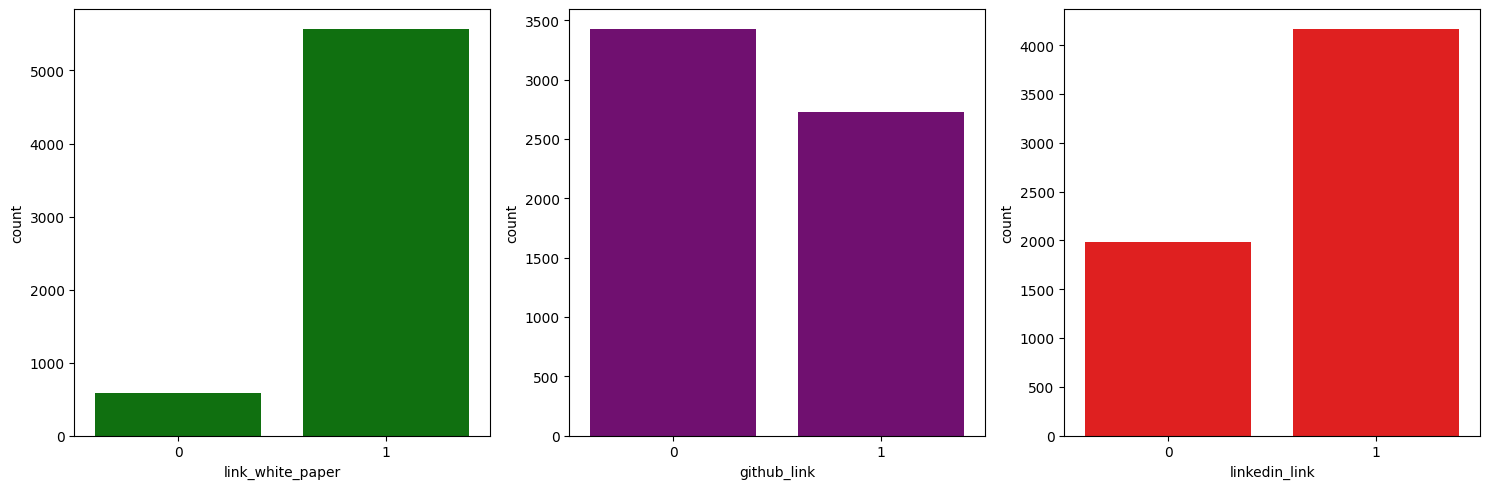

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='link_white_paper', ax=ax[0], color='green')
sns.countplot(data=df, x='github_link', ax=ax[1], color='purple')
sns.countplot(data=df, x='linkedin_link', ax=ax[2], color='red')
plt.tight_layout()